<h1>Assignment IV– Individual Take Home Assignment</h1>

<h3>1. ANN regression model</h3>

In [30]:
#import libraries 

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [31]:
#Import Variables & standardize
dataset=np.loadtxt("data/school_grades.csv", delimiter=",", skiprows=1)
x=dataset[:,0:4]
y=dataset[:,4]
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [32]:
#Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [33]:
#defining a 3 layer deep NN [12,8,1]
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [34]:
#The mean_squared_error (mse) and mean_absolute_error (mae) are our loss functions – i.e. an estimate of how accurate the neural network is in predicting the test data. 
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [35]:
#fitting model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)
end_time = time.time()
ANN_time = end_time - start_time

Train on 236 samples, validate on 60 samples
Epoch 1/150
236/236 [==============================] - 0s 852us/sample - loss: 0.3438 - mse: 0.3438 - mae: 0.5399 - val_loss: 0.3271 - val_mse: 0.3271 - val_mae: 0.5129
Epoch 2/150
236/236 [==============================] - 0s 83us/sample - loss: 0.3161 - mse: 0.3161 - mae: 0.5153 - val_loss: 0.3055 - val_mse: 0.3055 - val_mae: 0.4949
Epoch 3/150
236/236 [==============================] - 0s 47us/sample - loss: 0.3003 - mse: 0.3003 - mae: 0.5027 - val_loss: 0.2965 - val_mse: 0.2965 - val_mae: 0.4882
Epoch 4/150
236/236 [==============================] - 0s 42us/sample - loss: 0.2932 - mse: 0.2932 - mae: 0.4968 - val_loss: 0.2892 - val_mse: 0.2892 - val_mae: 0.4823
Epoch 5/150
236/236 [==============================] - 0s 42us/sample - loss: 0.2853 - mse: 0.2853 - mae: 0.4903 - val_loss: 0.2802 - val_mse: 0.2802 - val_mae: 0.4749
Epoch 6/150
236/236 [==============================] - 0s 42us/sample - loss: 0.2748 - mse: 0.2748 - mae: 0.4814 -

236/236 [==============================] - 0s 34us/sample - loss: 0.0144 - mse: 0.0144 - mae: 0.0817 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.0954
Epoch 50/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0139 - mse: 0.0139 - mae: 0.0796 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0927
Epoch 51/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0134 - mse: 0.0134 - mae: 0.0776 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.0904
Epoch 52/150
236/236 [==============================] - 0s 34us/sample - loss: 0.0130 - mse: 0.0130 - mae: 0.0759 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0885
Epoch 53/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0126 - mse: 0.0126 - mae: 0.0745 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0871
Epoch 54/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0122 - mse: 0.0122 - mae: 0.0735 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0861

236/236 [==============================] - 0s 38us/sample - loss: 0.0087 - mse: 0.0087 - mae: 0.0596 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0701
Epoch 98/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0087 - mse: 0.0087 - mae: 0.0594 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0699
Epoch 99/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0087 - mse: 0.0087 - mae: 0.0595 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0700
Epoch 100/150
236/236 [==============================] - 0s 34us/sample - loss: 0.0087 - mse: 0.0087 - mae: 0.0596 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0699
Epoch 101/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0087 - mse: 0.0087 - mae: 0.0595 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0695
Epoch 102/150
236/236 [==============================] - 0s 38us/sample - loss: 0.0087 - mse: 0.0087 - mae: 0.0589 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0

236/236 [==============================] - 0s 55us/sample - loss: 0.0085 - mse: 0.0085 - mae: 0.0576 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0677
Epoch 146/150
236/236 [==============================] - 0s 53us/sample - loss: 0.0085 - mse: 0.0085 - mae: 0.0571 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0675
Epoch 147/150
236/236 [==============================] - 0s 30us/sample - loss: 0.0085 - mse: 0.0085 - mae: 0.0570 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0679
Epoch 148/150
236/236 [==============================] - 0s 42us/sample - loss: 0.0085 - mse: 0.0085 - mae: 0.0585 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0684
Epoch 149/150
236/236 [==============================] - 0s 13us/sample - loss: 0.0085 - mse: 0.0085 - mae: 0.0583 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0678
Epoch 150/150
236/236 [==============================] - 0s 51us/sample - loss: 0.0084 - mse: 0.0084 - mae: 0.0572 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0

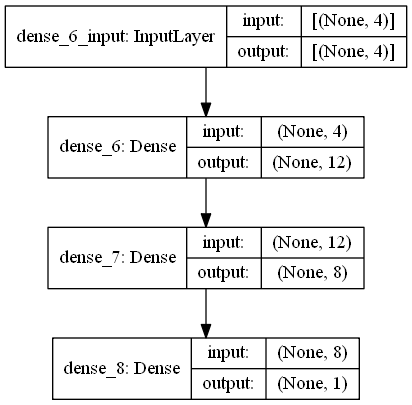

In [36]:
from tensorflow.keras.utils import plot_model
#Vizualize Model
plot_model(model, to_file='ANN_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


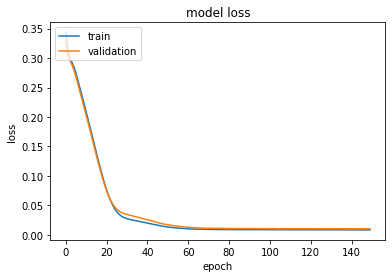

In [37]:
print(history.history.keys())
# plotting loss function with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
y_pred = model.predict(X_test)

MSE_scaled = mean_squared_error(y_test, y_pred)

MSE = mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred)) 

print("Scaled MSE:",MSE_scaled)
print("MSE:",MSE)
print("Runtime: %s seconds"%ANN_time)

Scaled MSE: 0.009582817080292176
MSE: 3.8331268356480934
Runtime: 2.195000648498535 seconds


<h3>2. Multiple Linear Regression Model</h3>

In [39]:
#import libraries 

%matplotlib inline

from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [40]:
#importing data
df = pd.read_csv('data/school_grades.csv')

#making copy to work with
df_copy = df.copy()

X = df_copy.drop(['G3'], axis=1)
y = df_copy["G3"]

#splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [41]:
# Fit regression model
start_time = time.time()
results = smf.ols('G3 ~ age + absences + G1 + G2', data=pd.concat([X_train,y_train], axis=1)).fit()
end_time = time.time()
MLR_time = end_time - start_time
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     245.1
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           9.94e-89
Time:                        10:30:04   Log-Likelihood:                -600.71
No. Observations:                 276   AIC:                             1211.
Df Residuals:                     271   BIC:                             1230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7954      1.900      0.419      0.6

In [42]:
y_pred = results.predict(X_test)

MSE = mean_squared_error(y_test, y_pred) 

print("MSE:",MSE)
print("Runtime: %s seconds"%MLR_time)

MSE: 1.4293875205069166
Runtime: 0.01698923110961914 seconds
